# Aim: To implement SVM using scikit-learn library and train it to classify Breast Cancer Data.

## Key Terms: 

**Hyperplane:** A hyperplane is a decision plane which separates between a set of objects having different class memberships.

**Support Vectors :** Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins.

**Margin :** A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

**SVM Kernel :** The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form.

**Linear Kernel :** A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

$ K(x, xi) = sum(x * xi) $

**Polynomial Kernel :** A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.
$ K(x,xi) = 1 + sum(x * xi)^d$

**RBF (Radial Basis Function) Kernel :** The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification.RBF can map an input space in infinite dimensional space.
$ K(x,xi) = exp(-gamma * sum((x xi^2)) $

Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.

**Part A: Basic SVM with Linear Kernel**

In [1]:
import sys, os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

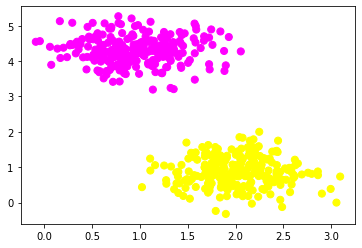

In [2]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=500, centers=2,
random_state=0, cluster_std=0.40)
# plotting scatters
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show()
# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

In [3]:
# Create a linear SVM classifier
model = SVC(kernel="linear")

In [4]:
# Train classifier
model.fit(X_train,y_train)

SVC(kernel='linear')

In [5]:
# Make predictions on unseen test data
clf_predictions = model.predict(X_test)
print(clf_predictions)
print("Accuracy: {}%".format(model.score(X_test, y_test) * 100 ))

[1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1
 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1]
Accuracy: 100.0%


No handles with labels found to put in legend.


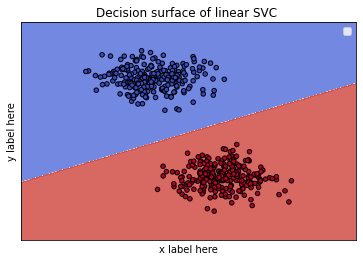

In [6]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

**Part B : Breast Cancer Prediction Example**

In [7]:
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()

In [8]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)
# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [9]:
# print data(feature)shape
cancer.data.shape

(569, 30)

In [10]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

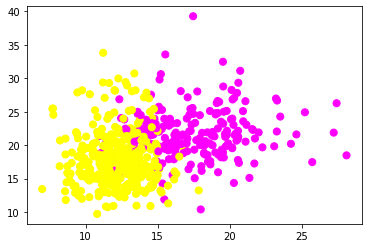

In [11]:
# plotting scatters
plt.scatter(cancer.data[:, 0], cancer.data[:, 1], c=cancer.target, s=50,cmap='spring');
plt.show()

In [12]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
##########################################
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=136,test_size=0.35)

In [13]:
#Import svm model
from sklearn.svm import SVC
#Create a svm Classifier
clf = SVC(kernel="linear")

#Train the model using the training sets
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test) 

In [14]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.955


In [15]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9621212121212122
Recall: 0.9694656488549618


**Assignment**:

Try SVM classifier on MNIST dataset, compare the preformance of linear, polynomial and RBF kernels.


In [18]:

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32.
# Flatten images to 1-D vector of 784 features (28*28).

x_train,x_test= x_train.reshape([-1,784]),x_test.reshape([-1,784])
x_train = np.array(x_train, dtype=np.float32)

x_test = np.array(x_test, dtype=np.float32)


num_features=784


# Normalize images value from [0, 255] to [0, 1].
x_train/=255.0
x_test/=255.0


X_train,X_test,y_train,y_test=x_train[:500],x_test[:500],y_train[:500],y_test[:500]
print(f"x_train shape:{X_train.shape} y_train shape:{y_train.shape}")

x_train shape:(500, 784) y_train shape:(500,)


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [22]:
model = GridSearchCV(SVC(),{
    'C':[1,10,20],
    'kernel':['linear','poly','rbf']
    },
    cv=5
)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20], 'kernel': ['linear', 'poly', 'rbf']})

In [24]:
import pandas as pd

df=pd.DataFrame(model.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029399,0.005463,0.005799,0.000401,1,linear,"{'C': 1, 'kernel': 'linear'}",0.87,0.91,0.83,0.91,0.86,0.876,0.030725,4
1,0.034599,0.001356,0.005800,0.000401,1,poly,"{'C': 1, 'kernel': 'poly'}",0.71,0.87,0.77,0.87,0.79,0.802,0.061449,9
2,0.041600,0.001200,0.014999,0.000633,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.89,0.92,0.81,0.92,0.89,0.886,0.040299,3
3,0.027807,0.003919,0.006201,0.001167,10,linear,"{'C': 10, 'kernel': 'linear'}",0.87,0.91,0.83,0.91,0.86,0.876,0.030725,4
4,0.036607,0.001630,0.005200,0.000401,10,poly,"{'C': 10, 'kernel': 'poly'}",0.75,0.88,0.78,0.89,0.81,0.822,0.054918,7
5,0.048987,0.001400,0.015202,0.000749,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.90,0.93,0.86,0.92,0.89,0.900,0.024495,1
6,0.028211,0.001732,0.005380,0.000494,20,linear,"{'C': 20, 'kernel': 'linear'}",0.87,0.91,0.83,0.91,0.86,0.876,0.030725,4
7,0.037797,0.002386,0.005993,0.001109,20,poly,"{'C': 20, 'kernel': 'poly'}",0.75,0.88,0.77,0.89,0.81,0.820,0.056569,8
8,0.051380,0.002571,0.015421,0.000805,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.90,0.93,0.86,0.92,0.89,0.900,0.024495,1


In [25]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.876
1,1,poly,0.802
2,1,rbf,0.886
3,10,linear,0.876
4,10,poly,0.822
5,10,rbf,0.900
6,20,linear,0.876
7,20,poly,0.820
8,20,rbf,0.900
